In [117]:
import pandas as pd   
pd.options.display.max_rows = 999
import numpy as np  
import sys
import Performance as pf
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import importlib 
importlib.reload(pf)
pd.options.display.float_format = '{:,.2f}'.format

# Trading Demo   

This notebook is an overview of the simulation trading result using Kenny's proprietary stat-arb trading model.   
Two basic spread trading strategies result are presented below, one is trading the BTC spot vs BTC-Perm future, the other is trading the BTC-PERM future vs ETH-PERM future.   
The backtest data is acquired from the FTX exchange.  
The simulation period is from 2019-10-01 to 2020-03-19.   

## BTC/USD vs BTC-PERM on FTX 


In [118]:
df_eod = pd.read_csv('SimEOD/EOD_Report_BTCSPOTvsFuture_1111.csv', index_col = 0)

In [119]:
eod = pf.EOD_Report(df_eod)

In [121]:
eod.summary()

num_days            171.00
total_pnl       235,528.22
avg_daily_pnl     1,377.36
std               6,926.21
low             -21,621.45
high             53,487.97
sharpe                3.15
dtype: float64

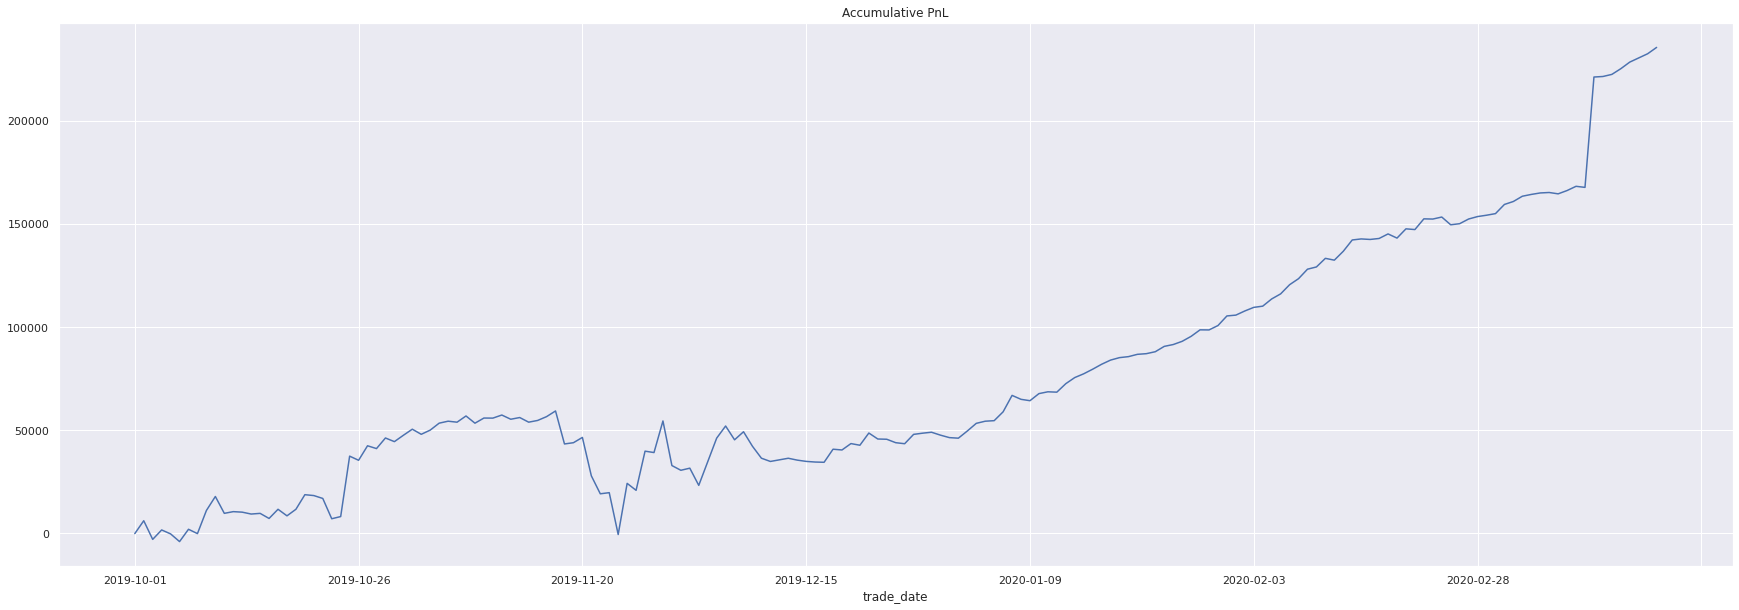

In [122]:
eod.plot_cumpnl()

<Figure size 432x288 with 0 Axes>

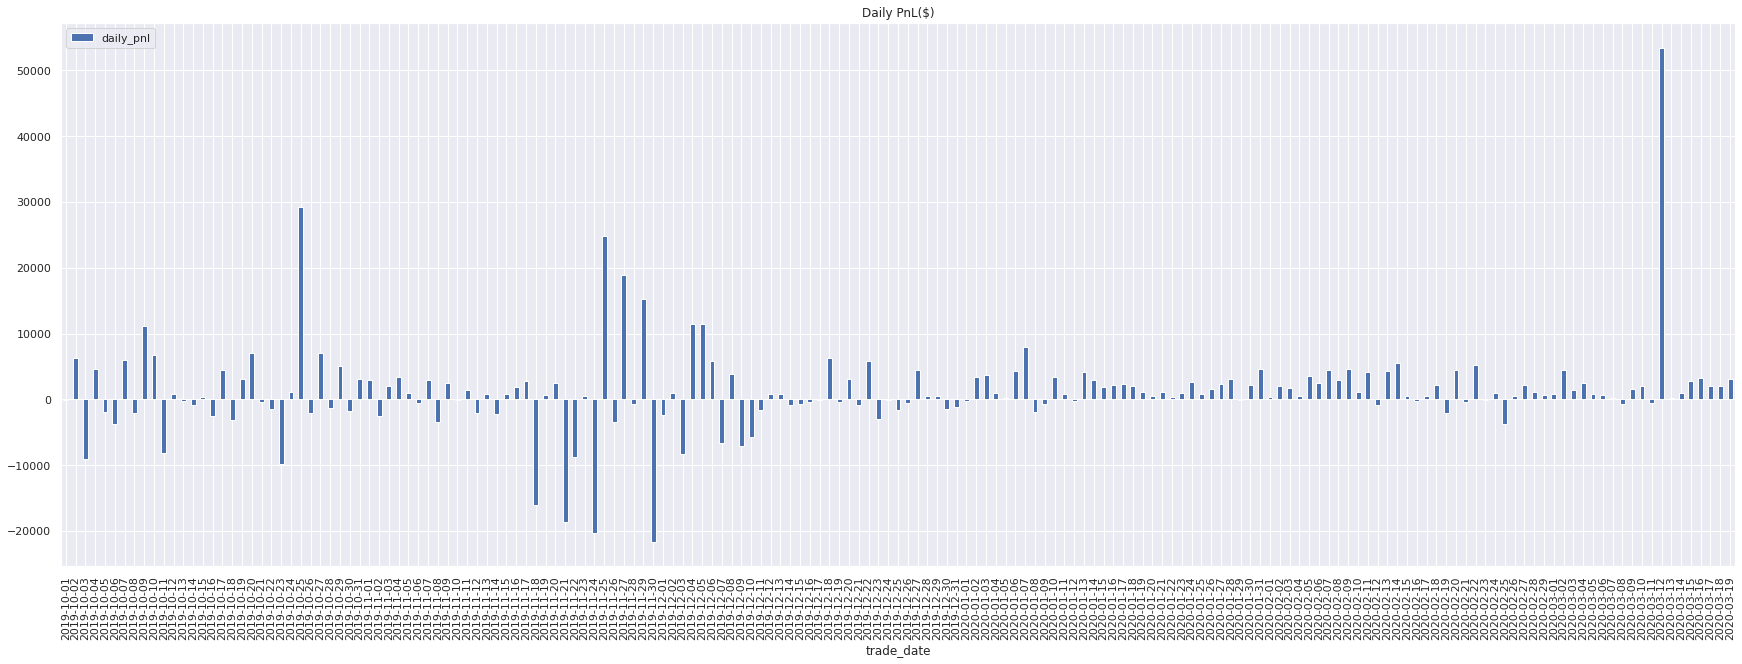

In [123]:
eod.plot_pnl()

## BTC-PERM vs ETH-PERM on FTX 

Simulation Period: 2019-10-01 to 2020-03-19  

In [55]:
df_eod = pd.read_csv('SimEOD/EOD_Report_BTCETH_30102.csv', index_col = 0)

In [56]:
eod = pf.EOD_Report(df_eod)

## Trading Summary    

A daily stoploss of $2000 is applied. 

In [60]:
_new_df = eod.apply_stoploss(-2000)

With stoploss threshold -2,000.00 applied:
num_days            171.00
total_pnl       492,555.82
avg_daily_pnl     2,880.44
std              18,634.18
low              -2,000.00
high            165,317.39
sharpe                2.45
dtype: float64


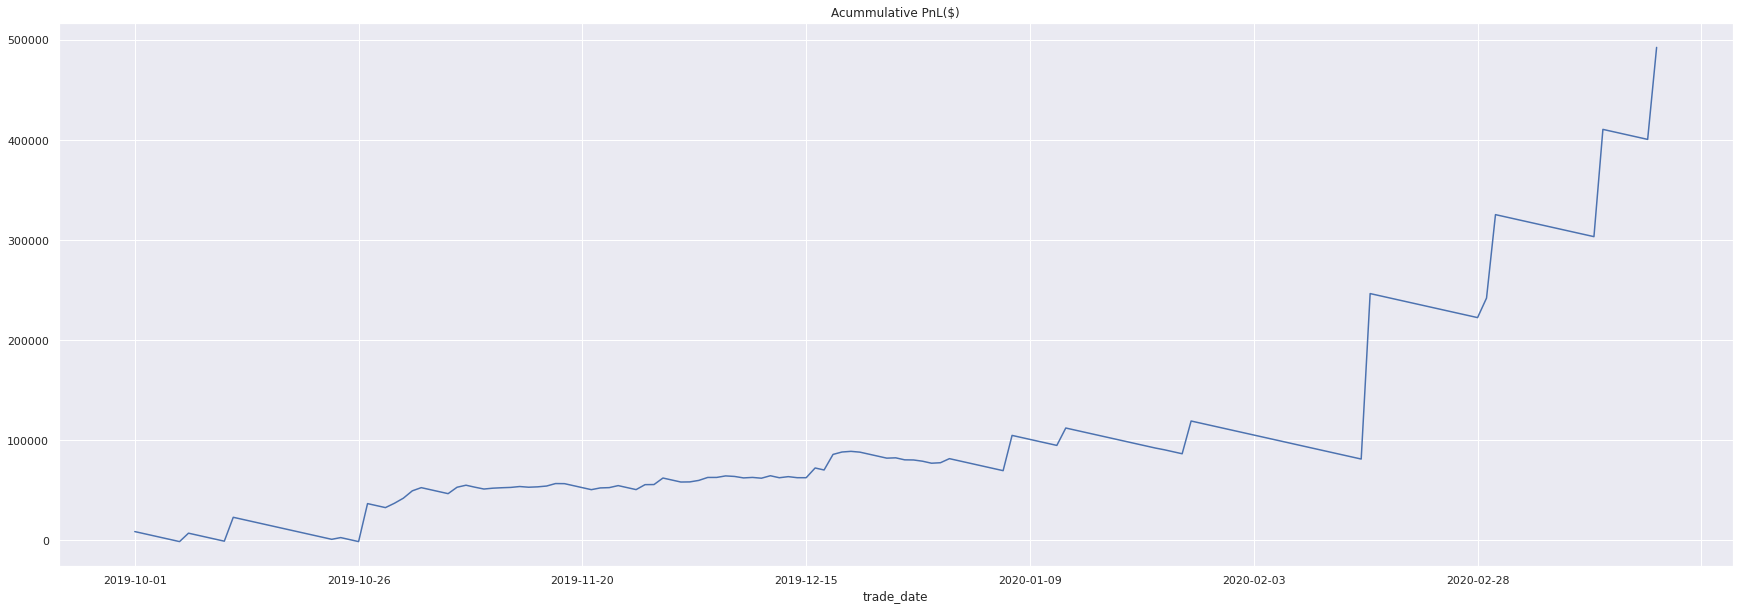

In [124]:
_new_df.daily_pnl.cumsum().plot(figsize = (30,10), title = 'Acummulative PnL($)')

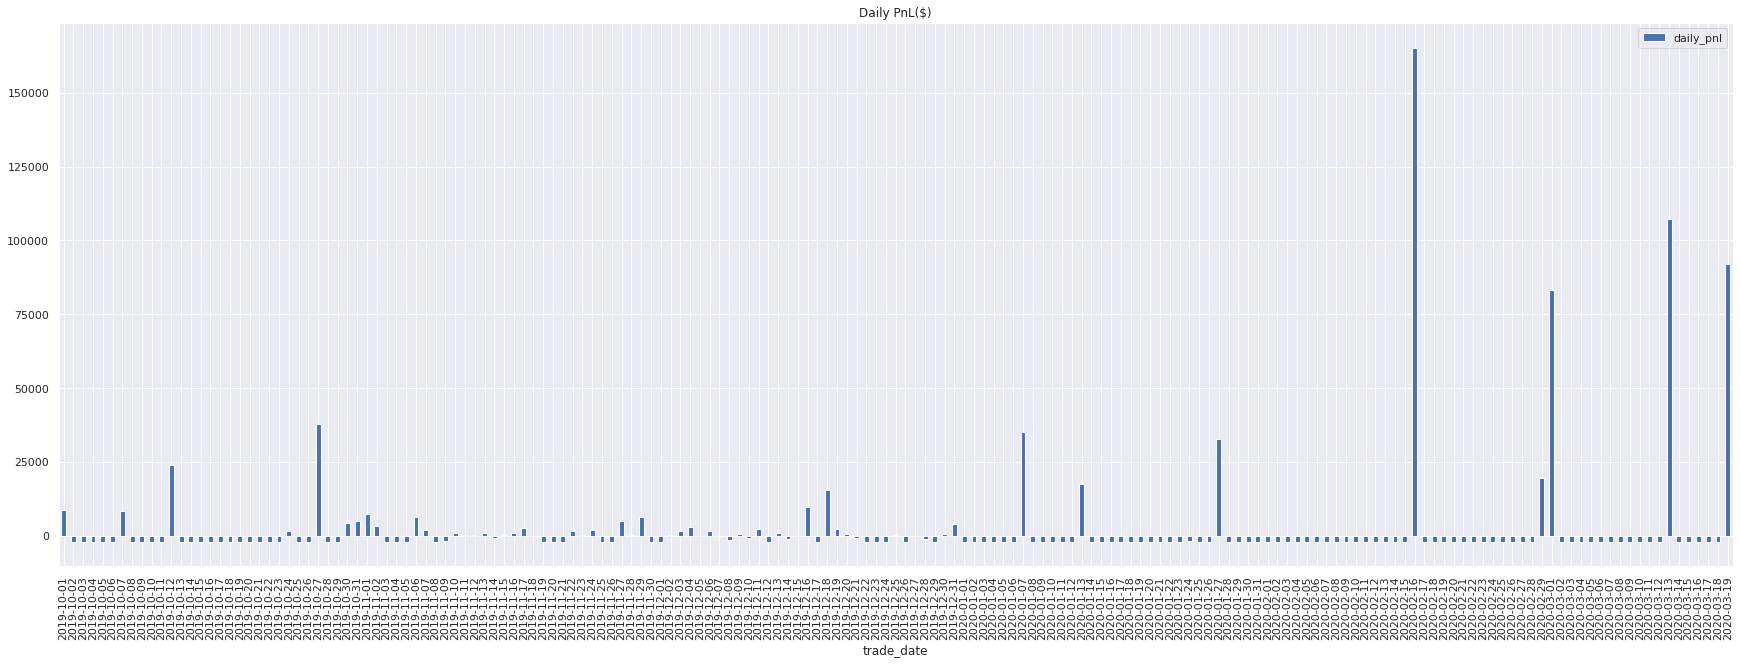

In [127]:
_new_df.plot(y = 'daily_pnl', figsize = (30,10), kind = 'bar', title = 'Daily PnL($)')

In [128]:
ds = pd.read_csv('Session/session_2020-03-16.csv', index_col = 0)